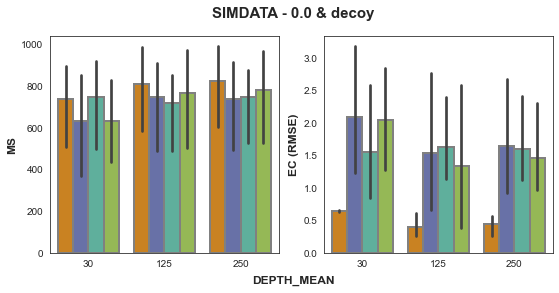

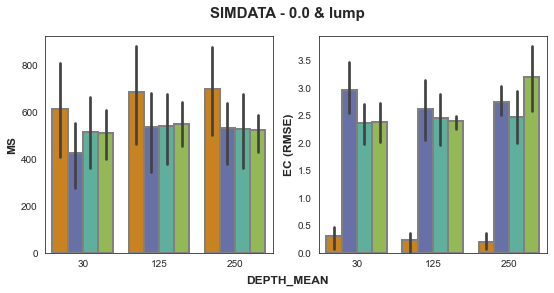

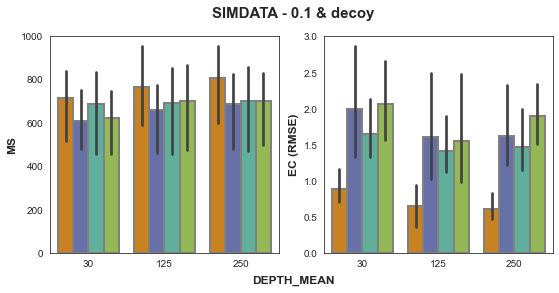

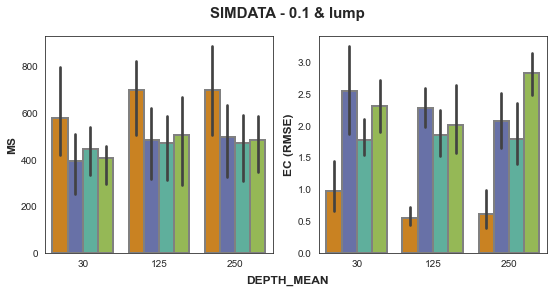

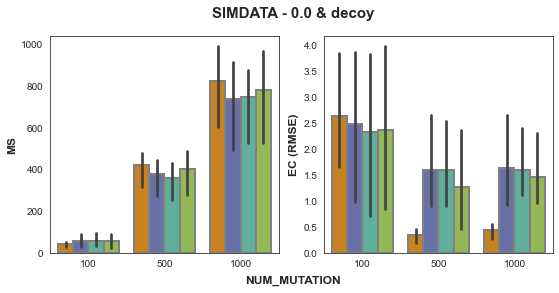

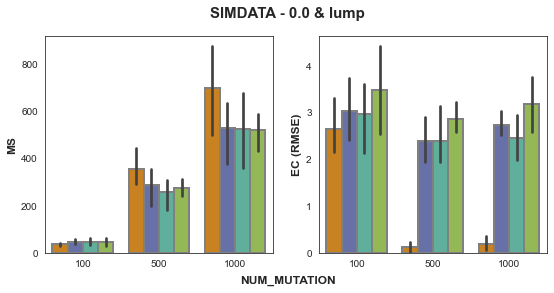

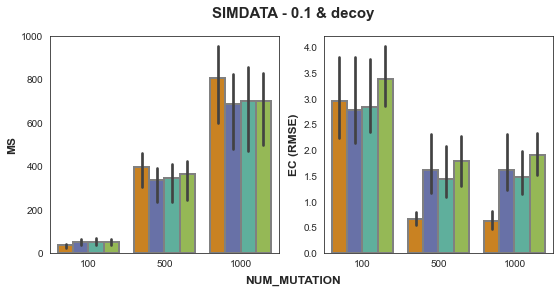

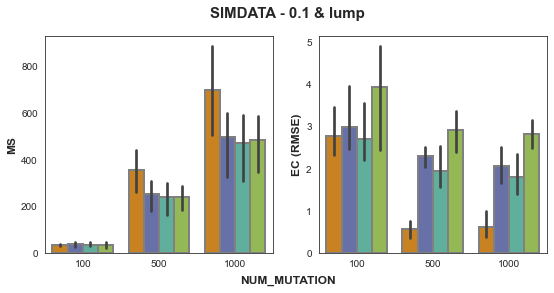

In [1]:
import numpy as np 
import pandas as pd
import os, glob

def drawfigure (long_df, x, title, saveloc ):
    import matplotlib 
    matplotlib.rcParams["font.family"] = 'arial'
    import palettable
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy.stats import ttest_ind

    tabl = palettable.tableau.Tableau_20.mpl_colors
    safe7 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
    Gr_10 = palettable.scientific.sequential.GrayC_20.mpl_colors

    colorlist = [i for i in safe7]
    sns.set_style("white")
    #sns.set_palette("tab10")
    sns.set_palette(sns.color_palette(colorlist))


    # Create a grouped bar graph
    fig, ax = plt.subplots( nrows = 1, ncols = 2, figsize = (9, 4))

    sns.barplot(data = long_df, x = x, y = 'MS', hue = 'tool', 
                    linewidth = 2, edgecolor='gray', 
                    dodge = True,
                    ax = ax[0])
    ax[0].set_xlabel( None )
    ax[0].set_ylabel( "MS", fontsize = 12, fontweight = "semibold" )
    ax[0].legend_.remove()
    #ax[0].legend ( title = None, labels = ["CLEMENT", "pyclone", "sciclone", "qc"] )

    sns.barplot(data = long_df, x = x, y = 'EC', hue = 'tool', 
                    linewidth = 2, edgecolor='gray', 
                    ax = ax[1])
    ax[1].set_xlabel( None )
    ax[1].set_ylabel( "EC (RMSE)", fontsize = 12, fontweight = "semibold" )
    ax[1].legend_.remove()
    #ax[1].legend ( title = None, labels = ["CLEMENT", "pyclone", "sciclone", "qc"] )

    plt.suptitle( title , fontsize = 15, y = 0.98, fontweight = "semibold" )
    fig.text (x = 0.5, y = 0.02, ha = "center", s = "{}".format( x  ), fontsize = 12, fontweight = "semibold")

    plt.savefig ( saveloc, dpi = 300 )
    plt.show()


def bm_by_depth ( NUM_BLOCK_LIST, NUM_MUTATION_LIST, DEPTH_MEAN_LIST, FP_RATIO_LIST, SIMDATA_LIST):
    toollist = ["CLEMENT_decision", "pyclonevi", "sciclone", "quantumclone"]

    for FP_RATIO in FP_RATIO_LIST:
        for SIMDATA in SIMDATA_LIST:        
            long_df = pd.DataFrame ( columns = ["DEPTH_MEAN", "NUM_BLOCK", "NUM_MUTATION", "FP_RATIO", "SIMDATA", "tool", "MS", "EC"] )
        
            for DEPTH_MEAN in DEPTH_MEAN_LIST:
                for NUM_BLOCK in NUM_BLOCK_LIST:
                    for NUM_MUTATION in NUM_MUTATION_LIST:
                        INPUT_DIR_LIST = sorted ( glob.glob ("/data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_" + str(NUM_BLOCK) + "D/n" + str(NUM_MUTATION) + "_" + str(DEPTH_MEAN) + "x/" + str (SIMDATA) + "/" + str(FP_RATIO) + "/BM_FINAL.tsv") )

                        for INPUT_DIR in INPUT_DIR_LIST:
                            if not os.path.exists ( INPUT_DIR ):
                                print (INPUT_DIR + "없음")
                                continue
        
                            df = pd.read_csv (INPUT_DIR , sep = "\t", header = None, index_col = 0)
                            for tool in toollist:
                                long_df.loc[len(long_df.index)] = [ DEPTH_MEAN, NUM_BLOCK, NUM_MUTATION, FP_RATIO, SIMDATA, tool, df.loc [tool][1], df.loc [tool][3] ]   # 맨 끝에 하나씩 추가
                
            drawfigure (long_df, 'DEPTH_MEAN', "SIMDATA - {} & {}".format (FP_RATIO, SIMDATA), "/data/project/Alzheimer/YSscript/cle/Benchmarking/1.SimData/bm_for_revision/1.SimData-bydepth_{}_{}.jpg".format (FP_RATIO, SIMDATA))
    return long_df



def bm_by_nummutation ( NUM_BLOCK_LIST, NUM_MUTATION_LIST, DEPTH_MEAN_LIST, FP_RATIO_LIST, SIMDATA_LIST):
    toollist = ["CLEMENT_decision", "pyclonevi", "sciclone", "quantumclone"]

    for FP_RATIO in FP_RATIO_LIST:
        for SIMDATA in SIMDATA_LIST:        
            long_df = pd.DataFrame ( columns = ["NUM_BLOCK", "NUM_MUTATION", "DEPTH_MEAN", "FP_RATIO", "SIMDATA", "tool", "MS", "EC"] )
        
            for NUM_MUTATION in NUM_MUTATION_LIST:
                for NUM_BLOCK in NUM_BLOCK_LIST:
                    for DEPTH_MEAN in DEPTH_MEAN_LIST:
                        INPUT_DIR_LIST = sorted ( glob.glob ("/data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_" + str(NUM_BLOCK) + "D/n" + str(NUM_MUTATION) + "_" + str(DEPTH_MEAN) + "x/" + str (SIMDATA) + "/" + str(FP_RATIO) + "/BM_FINAL.tsv") )

                        for INPUT_DIR in INPUT_DIR_LIST:
                            if not os.path.exists ( INPUT_DIR ):
                                print (INPUT_DIR + "없음")
                                continue
        
                            df = pd.read_csv (INPUT_DIR , sep = "\t", header = None, index_col = 0)
                            for tool in toollist:
                                long_df.loc[len(long_df.index)] = [ NUM_BLOCK, NUM_MUTATION, DEPTH_MEAN, FP_RATIO, SIMDATA, tool, df.loc [tool][1], df.loc [tool][3] ]   # 맨 끝에 하나씩 추가
            
            drawfigure (long_df, 'NUM_MUTATION', "SIMDATA - {} & {}".format (FP_RATIO, SIMDATA), "/data/project/Alzheimer/YSscript/cle/Benchmarking/1.SimData/bm_for_revision/1.SimData-bynummutation_{}_{}.jpg".format (FP_RATIO, SIMDATA))
    return long_df






if __name__ == "__main__":
    kwargs = {}

    NUM_BLOCK_LIST = [ 1, 2, 3 ]             # 1, 2, 3
    NUM_MUTATION_LIST = [ 1000, 500, 100 ]    # 100, 500, 100
    DEPTH_MEAN_LIST = [ 250, 125, 30 ]       # 250, 125, 30
    FP_RATIO_LIST = [ 0.0, 0.1  ]        # 0.0, 0.1
    SIMDATA_LIST = [ "decoy", "lump"] # "decoy", "lump"

    toollist = ["CLEMENT_decision", "pyclonevi", "sciclone", "quantumclone"]
                           

    # Depth에 따른 benchmark (NUM_MUTATION은 1000으로 고정)
    long_df = bm_by_depth ( NUM_BLOCK_LIST, [1000], DEPTH_MEAN_LIST, FP_RATIO_LIST, SIMDATA_LIST )
    
    #  NUM_MUTATION에 따른 benchmark (DEPTH는 250으로 고정)
    long_df = bm_by_nummutation ( NUM_BLOCK_LIST, NUM_MUTATION_LIST, [250], FP_RATIO_LIST, SIMDATA_LIST )

    long_df


        